# Youtube Adview Prediction
Youtube advertisers pay content creators based on adviews and clicks for the goods and services being marketed. They want to estimate the adview based on other metrics like comments, likes etc. The problem statement is therefore to train various regression models and choose the best one to predict the number of adviews. The data needs to be refined and cleaned before feeding in the algorithms for better results.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
path = "" # Put path of your folder of your data if it's not in the same folder
data_train = pd.read_csv(path + "train.csv")

data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [2]:
data_train.shape

(14999, 9)

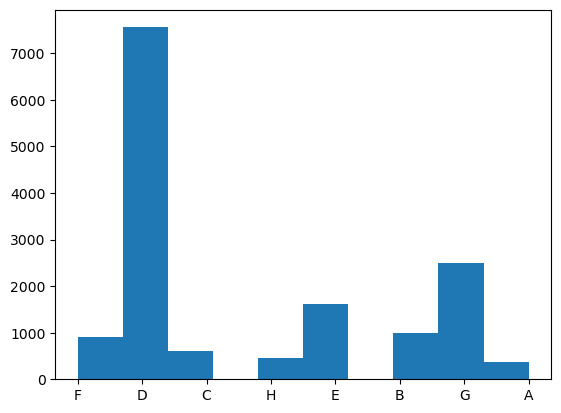

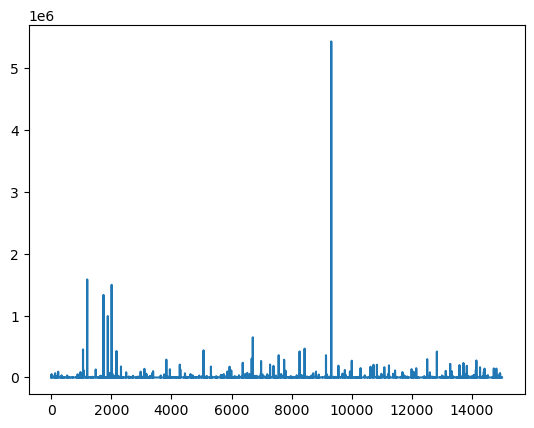

C:\Users\Milind\AppData\Local\Temp\ipykernel_6492\2138582918.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


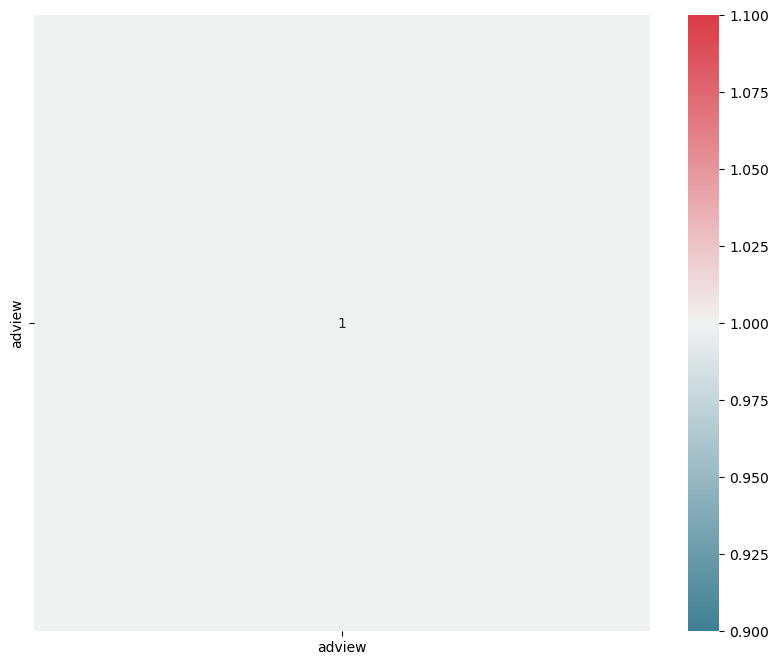

In [3]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()


In [4]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [5]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

column_vidid=data_train['vidid']

In [6]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [7]:
# Convert Time_in_sec for duration
import datetime
import time

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = '' 
            elif(i == "M"):
                m = mm 
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s 
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [8]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [9]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [10]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)


# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)


Mean Absolute Error: 3707.3780058245334
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


C:\Users\Milind\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.3780058245334
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [11]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

# Random Forest Regressor
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2

random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                      min_samples_split=min_samples_split, 
                                      min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train, y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 2953.8053278688526
Mean Squared Error: 1210742391.306011
Root Mean Squared Error: 34795.72375028304


C:\Users\Milind\AppData\Local\Temp\ipykernel_6492\1153837117.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Mean Absolute Error: 3339.706699071535
Mean Squared Error: 716642404.9629533
Root Mean Squared Error: 26770.17752953748


# Build an artificial neural network and train it with different layers and hyperparameters.

In [12]:
# Artificial Neural Network
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
    Dense(6, activation="relu",
    input_shape=X_train.shape[1:]),
    Dense(6,activation="relu"),
    Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)
ann.summary()

Epoch 1/100
366/366 [==============================] - 2s 3ms/step - loss: 767406656.0000 - mean_squared_error: 767406656.0000
Epoch 2/100
366/366 [==============================] - 1s 3ms/step - loss: 767402048.0000 - mean_squared_error: 767402048.0000
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 767390848.0000 - mean_squared_error: 767390848.0000
Epoch 4/100
366/366 [==============================] - 1s 3ms/step - loss: 767371328.0000 - mean_squared_error: 767371328.0000
Epoch 5/100
366/366 [==============================] - 1s 3ms/step - loss: 767336512.0000 - mean_squared_error: 767336512.0000
Epoch 6/100
366/366 [==============================] - 1s 3ms/step - loss: 767283392.0000 - mean_squared_error: 767283392.0000
Epoch 7/100
366/366 [==============================] - 1s 3ms/step - loss: 767218368.0000 - mean_squared_error: 767218368.0000
Epoch 8/100
366/366 [==============================] - 1s 3ms/step - loss: 767138816.0000 - mean_squared_error:

In [13]:
print_error(X_test,y_test,ann)

92/92 [==============================] - 0s 3ms/step
Mean Absolute Error: 3197.4945120296843
Mean Squared Error: 829279223.8679253
Root Mean Squared Error: 28797.208612431958


In [14]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")